<a href="https://colab.research.google.com/github/priyasubha4/Python/blob/main/PCA_Wine_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Q) To classify the wine with good accuracy after reducing the number of dimensions

In [2]:
# Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd     

In [12]:
# Importing the Wine dataset
dataset = pd.read_csv('/content/wine.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [13]:
# Splitting the dataset into the Training set and Test Set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split ( X, y, test_size = 0.2, random_state = 0)                                    

In [14]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
# Applying PCA
from sklearn. decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [16]:
# Training the KNN Classification model on the Training set
# Fitting KNN Classification to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
# Making the confusion Matrix and Calculate the Acccuracy Score
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix (y_test, y_pred)
print(cm)

[[36]]


In [9]:
from sklearn.metrics import accuracy_score
sr = accuracy_score (y_test, y_pred)
accuracy = sr*100
accuracy

100.0

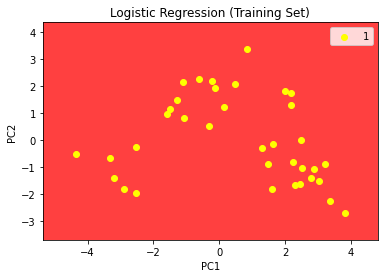

In [25]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:,1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)): 
  plt.scatter( X_set[y_set == j, 0], X_set[y_set ==j, 1],
                                                     c = ListedColormap (('yellow', 'green', 'blue'))(i), label = j)
plt.title ('Logistic Regression (Training Set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()
